In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Simulated Seplat Energy Data (Years, Natural Gas Production [MMscf], Oil Price [USD/barrel])
years = np.arange(2010, 2020)
gas_production = np.array([300, 350, 370, 400, 420, 390, 410, 430, 450, 470])  # in MMscf
oil_prices = np.array([80, 100, 110, 90, 95, 60, 75, 85, 70, 65])  # in USD/barrel

# Target Variable: Oil Production (barrels/day) – Simulated based on gas and oil price
oil_production = 50 * gas_production + 10 * oil_prices + np.random.normal(0, 500, size=10)

# Combine features into design matrix X
X = np.column_stack((years, gas_production, oil_prices))
y = oil_production

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Display first 5 rows of normalized design matrix
print("Normalized Design Matrix (first 5 rows):\n", X_normalized[:5])

# Optional: Create a DataFrame for clarity
columns = ['Year', 'Gas_Production_MMscf', 'Oil_Price_USD']
df = pd.DataFrame(X, columns=columns)
df['Oil_Production_Target'] = y

# Display raw (non-normalized) data table
print("\nRaw Seplat Data (with target):\n", df.head())


Normalized Design Matrix (first 5 rows):
 [[-1.5666989  -2.09691178 -0.19738551]
 [-1.21854359 -1.03786543  1.11851788]
 [-0.87038828 -0.61424689  1.77646958]
 [-0.52223297  0.02118093  0.46056619]
 [-0.17407766  0.44479947  0.78954203]]

Raw Seplat Data (with target):
    Year  Gas_Production_MMscf  Oil_Price_USD  Oil_Production_Target
0  2010                   300             80           15277.536895
1  2011                   350            100           18937.050596
2  2012                   370            110           19913.853314
3  2013                   400             90           21825.145672
4  2014                   420             95           21748.193667


Normalization adjusts feature values so they have a mean of zero and a standard deviation of one. This ensures that all features contribute equally to the model, regardless of their original scale. It also helps improve the performance and stability of gradient-based algorithms by preventing features with larger values from dominating the learning process.


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Simulated Seplat Energy Data
years = np.arange(2010, 2020)
gas_production = np.array([300, 350, 370, 400, 420, 390, 410, 430, 450, 470])  # MMscf
oil_prices = np.array([80, 100, 110, 90, 95, 60, 75, 85, 70, 65])  # USD/barrel

# Target variable: Simulated oil production
np.random.seed(42)
oil_production = 50 * gas_production + 10 * oil_prices + np.random.normal(0, 500, size=10)

# Create design matrix X and target y
X = np.column_stack((years, gas_production, oil_prices))
y = oil_production

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Define linear regression prediction function
def predict(X, w, b):
    return np.dot(X, w) + b

# Cost functions
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Try different (w, b) combinations
weights_list = [
    (np.array([1.5, 1.5, 1.5]), 0.5),
    (np.array([2.0, 2.0, 2.0]), 1.0),
    (np.array([1.0, 0.5, 2.0]), -1.0),
]

# Evaluate costs
for i, (w, b) in enumerate(weights_list, 1):
    y_pred = predict(X_normalized, w, b)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    print(f"Trial {i}:")
    print(f"  Weights: {w}, Bias: {b}")
    print(f"  MSE: {mse:.2f}")
    print(f"  MAE: {mae:.2f}\n")


Trial 1:
  Weights: [1.5 1.5 1.5], Bias: 0.5
  MSE: 446547031.15
  MAE: 21003.53

Trial 2:
  Weights: [2. 2. 2.], Bias: 1.0
  MSE: 446522378.47
  MAE: 21003.03

Trial 3:
  Weights: [1.  0.5 2. ], Bias: -1.0
  MSE: 446617460.32
  MAE: 21005.03



Mean Squared Error (MSE) penalizes larger errors more than Mean Absolute Error (MAE) because it squares the difference between the predicted and actual values. This squaring means that larger errors grow exponentially, making MSE more sensitive to outliers. In contrast, MAE treats all errors equally by taking their absolute value, resulting in a more balanced assessment of overall error.


Optimized Weights: [ 955.65019553 1323.41333814  201.0607392 ]
Optimized Bias: 18218.485351532807
Final MSE: 8322631.373428094


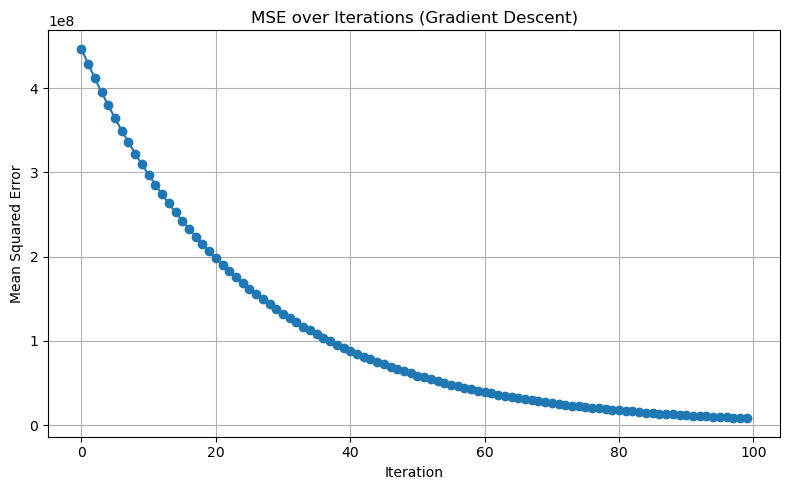

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare the data (same as Activity 1)
years = np.arange(2010, 2020)
gas_production = np.array([300, 350, 370, 400, 420, 390, 410, 430, 450, 470])  # MMscf
oil_prices = np.array([80, 100, 110, 90, 95, 60, 75, 85, 70, 65])  # USD/barrel

# Target: Oil production
np.random.seed(42)
oil_production = 50 * gas_production + 10 * oil_prices + np.random.normal(0, 500, size=10)

X = np.column_stack((years, gas_production, oil_prices))
y = oil_production
m = len(y)  # Number of samples

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 2: Initialize parameters
w = np.zeros(X_normalized.shape[1])
b = 0
learning_rate = 0.01
iterations = 100
mse_history = []

# Step 3: Gradient Descent loop
for i in range(iterations):
    # Prediction
    y_pred = np.dot(X_normalized, w) + b
    
    # Error
    error = y_pred - y
    
    # Gradients
    grad_w = (2/m) * np.dot(X_normalized.T, error)
    grad_b = (2/m) * np.sum(error)
    
    # Update weights and bias
    w -= learning_rate * grad_w
    b -= learning_rate * grad_b
    
    # Compute and record MSE
    mse = np.mean(error ** 2)
    mse_history.append(mse)

# Step 4: Results
print("Optimized Weights:", w)
print("Optimized Bias:", b)
print("Final MSE:", mse_history[-1])

# Plot MSE History
plt.figure(figsize=(8, 5))
plt.plot(range(iterations), mse_history, marker='o')
plt.title("MSE over Iterations (Gradient Descent)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.tight_layout()
plt.show()


The learning rate controls how much the model updates its parameters in each iteration of gradient descent. If the learning rate is too small, convergence will be very slow, taking many iterations to reach the minimum. If it is too large, the model might overshoot the optimal solution, potentially causing divergence or oscillation around the minimum. Therefore, selecting an appropriate learning rate is crucial for efficient and stable convergence.


Synthetic Data Performance:
MSE: 49.59, MAE: 5.62

Real Seplat Data Performance:
MSE: 9018121.32, MAE: 2961.39


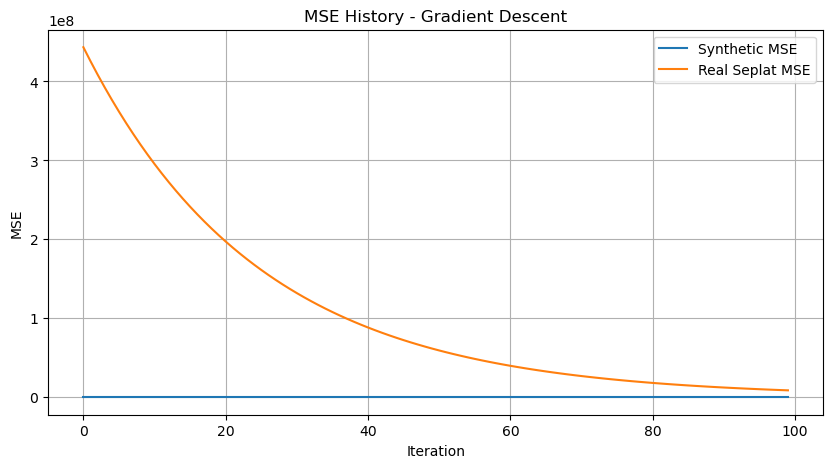

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# SYNTHETIC DATA GENERATION
np.random.seed(42)
x_synthetic = np.random.rand(100, 1) * 10  # feature: e.g., Hours worked
y_synthetic = 5 * x_synthetic.flatten() + 10 + np.random.randn(100) * 5  # Target: e.g., Output generated

# Normalize synthetic data
scaler_synth = StandardScaler()
x_synthetic_scaled = scaler_synth.fit_transform(x_synthetic)

# Split synthetic
X_train_synth, X_test_synth, y_train_synth, y_test_synth = train_test_split(
    x_synthetic_scaled, y_synthetic, test_size=0.2, random_state=42
)


# REAL SEPLAT DATA
years = np.arange(2010, 2020)
gas_production = np.array([300, 350, 370, 400, 420, 390, 410, 430, 450, 470])
oil_prices = np.array([80, 100, 110, 90, 95, 60, 75, 85, 70, 65])
oil_production = 50 * gas_production + 10 * oil_prices + np.random.normal(0, 500, size=10)

X_real = np.column_stack((years, gas_production, oil_prices))
y_real = oil_production

scaler_real = StandardScaler()
X_real_scaled = scaler_real.fit_transform(X_real)

# Split real data
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(
    X_real_scaled, y_real, test_size=0.2, random_state=42
)


# GRADIENT DESCENT FUNCTION
def gradient_descent(X, y, lr=0.01, n_iters=100):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    mse_history = []

    for i in range(n_iters):
        y_pred = np.dot(X, w) + b
        error = y_pred - y

        dw = (2 / m) * np.dot(X.T, error)
        db = (2 / m) * np.sum(error)

        w -= lr * dw
        b -= lr * db

        mse = np.mean(error ** 2)
        mse_history.append(mse)

    return w, b, mse_history

def evaluate(X, y, w, b):
    y_pred = np.dot(X, w) + b
    mse = np.mean((y - y_pred) ** 2)
    mae = np.mean(np.abs(y - y_pred))
    return mse, mae


# TRAIN MODELS
w_synth, b_synth, mse_hist_synth = gradient_descent(X_train_synth, y_train_synth)
w_real, b_real, mse_hist_real = gradient_descent(X_train_real, y_train_real)


# EVALUATE MODELS
mse_synth, mae_synth = evaluate(X_test_synth, y_test_synth, w_synth, b_synth)
mse_real, mae_real = evaluate(X_test_real, y_test_real, w_real, b_real)

print("Synthetic Data Performance:")
print(f"MSE: {mse_synth:.2f}, MAE: {mae_synth:.2f}\n")

print("Real Seplat Data Performance:")
print(f"MSE: {mse_real:.2f}, MAE: {mae_real:.2f}")

# PLOT MSE HISTORY
plt.figure(figsize=(10, 5))
plt.plot(mse_hist_synth, label='Synthetic MSE')
plt.plot(mse_hist_real, label='Real Seplat MSE')
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE History - Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()


The model might perform differently on real vs. synthetic data because real data is often more complex, noisy, and may contain outliers or hidden patterns that synthetic data does not capture. Synthetic data is usually generated with controlled relationships and assumptions, making it easier for models to learn. In contrast, real-world data involves more variability, irregularities, and unobserved factors, which can challenge the model’s ability to generalize and accurately predict outcomes.
